In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
import matplotlib.cm as cm
import cv2

In [45]:
# file_path = "HectorDebugCost.csv"
with open('HectorDebugCost.csv', 'r') as csvfile:
    data = list( csv.reader(csvfile, delimiter=',') )
    timestamp = np.array(data)[:,0].astype('float64') # dtype: U5 means string length < 5
    cost1 = np.array(data)[:,1].astype('float32')
    cost2 = np.array(data)[:,2].astype('float32')
    cost3 = np.array(data)[:,3].astype('float32')
    
    flag1 = np.array(data)[:,4].astype('float32')
    flag2 = np.array(data)[:,5].astype('float32')
    flag3 = np.array(data)[:,6].astype('float32')

In [9]:
timestamp[0]

1633165396.177537

Text(0.5, 1.0, 'cost of different scale')

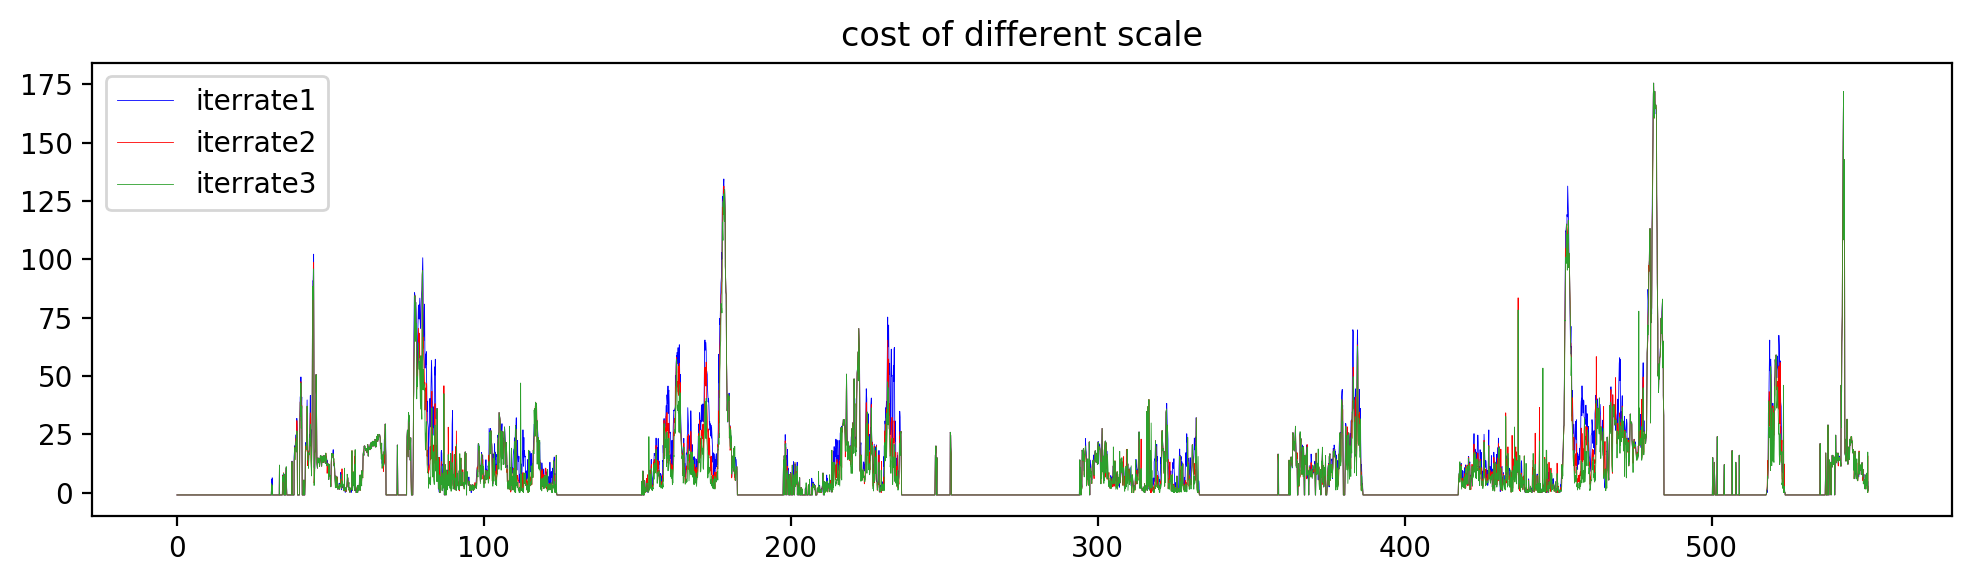

In [46]:
fig, ax = plt.subplots(figsize=(12,3), dpi=200)
plt.plot(timestamp-timestamp[0], cost1, color='b', label='iterrate1', linewidth=0.3)
plt.plot(timestamp-timestamp[0], cost2, color='r', label='iterrate2', linewidth=0.3)
plt.plot(timestamp-timestamp[0], cost3, color='tab:green', label='iterrate3', linewidth=0.3)
plt.legend()
plt.title('cost of different scale')

Text(0.5, 1.0, 'cost of different scale')

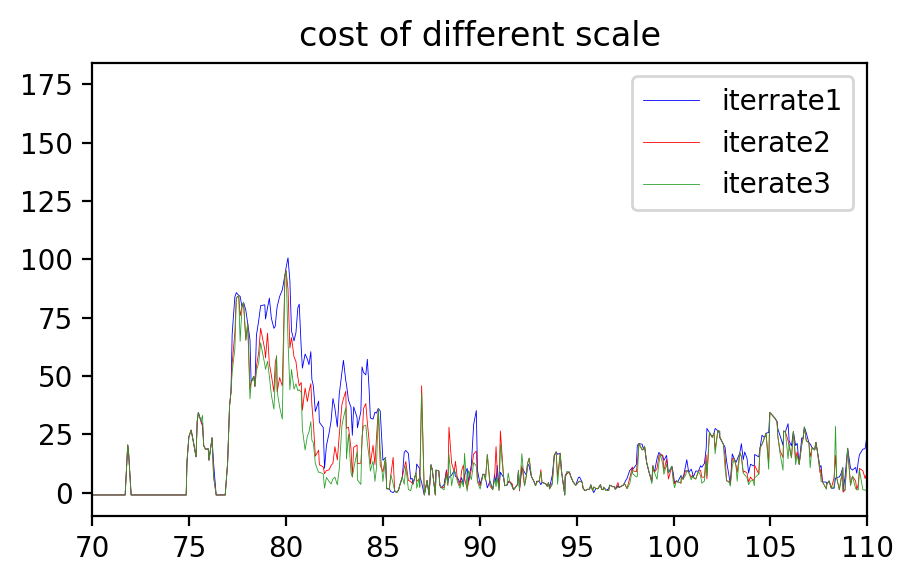

In [41]:
fig, ax = plt.subplots(figsize=(5,3), dpi=200)
plt.plot(timestamp-timestamp[0], cost1, color='b', label='iterrate1', linewidth=0.3)
plt.plot(timestamp-timestamp[0], cost2, color='r', label='iterate2', linewidth=0.3)
plt.plot(timestamp-timestamp[0], cost3, color='tab:green', label='iterate3', linewidth=0.3)
plt.xlim(70,110)
plt.legend()
plt.title('cost of different scale')

Text(0.5, 1.0, 'state of delta pose')

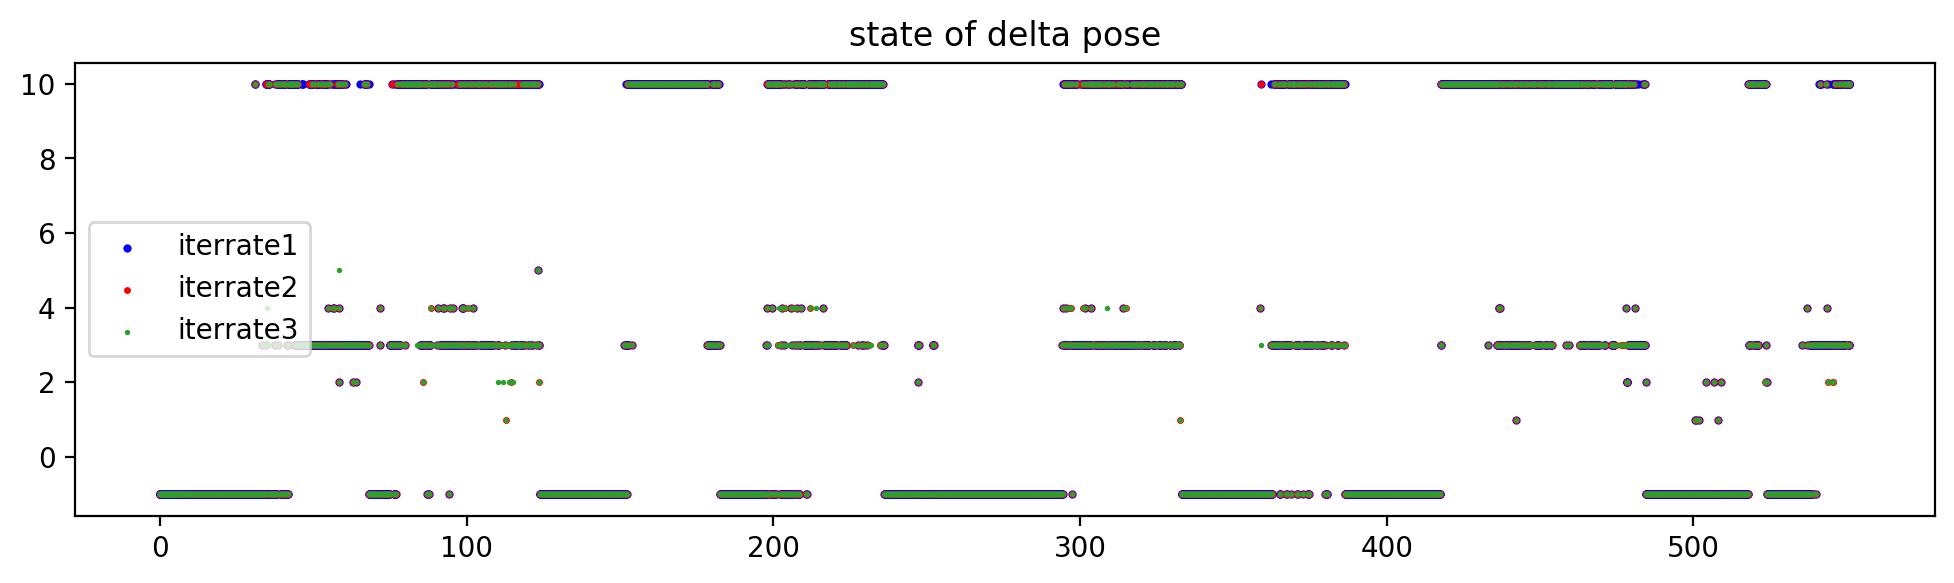

In [42]:
fig, ax = plt.subplots(figsize=(12,3), dpi=200)
plt.scatter(timestamp-timestamp[0], flag1, color='b', label='iterrate1', s=3.9)
plt.scatter(timestamp-timestamp[0], flag2, color='r', label='iterrate2', s=2.2)
plt.scatter(timestamp-timestamp[0], flag3, color='tab:green', label='iterrate3', s=0.9)
plt.legend()
plt.title('state of delta pose')

Text(0.5, 1.0, 'cost and calculated delta pose')

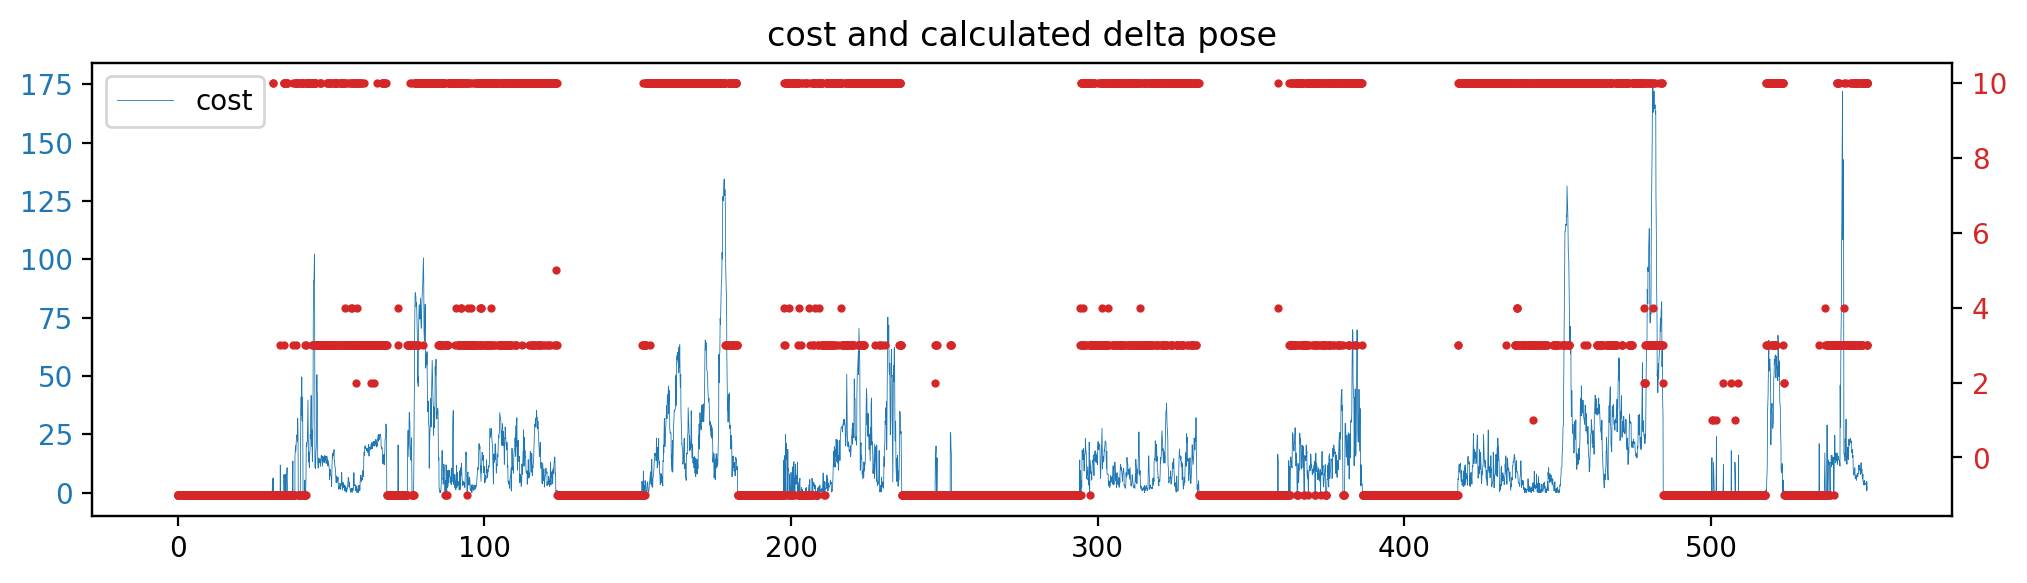

In [39]:
fig, ax1 = plt.subplots(figsize=(12,3), dpi=200)
plt.plot(timestamp-timestamp[0], cost1, color='tab:blue', label='cost', linewidth=0.3)
# plt.plot(timestamp-timestamp[0], cost2, color='r', label='scale2', linewidth=0.3)
# plt.plot(timestamp-timestamp[0], cost3, color='tab:green', label='scale3', linewidth=0.3)
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.legend()
ax2 = ax1.twinx()
plt.scatter(timestamp-timestamp[0], flag1, color='tab:red', label='delta pose', s=3.9)
ax2.tick_params(axis='y', labelcolor='tab:red')
# plt.scatter(timestamp-timestamp[0], flag2, color='r', label='scale2', s=2.2)
# plt.scatter(timestamp-timestamp[0], flag3, color='tab:green', label='scale3', s=0.9)
# plt.legend('middle')
plt.title('cost and calculated delta pose')

In [38]:
raw_pgm = cv2.imread("1111.pgm")
# raw_pgm = cv2.cvtColor(raw_pgm, cv2.COLOR_RGB2GRAY)

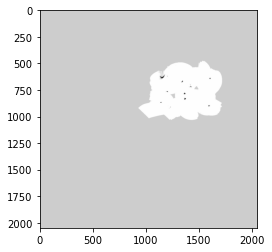

In [39]:
plt.imshow(raw_pgm)

In [43]:
grayValue = []
for i in range(2048):
    for j in range(2048):
        tmp = (int(raw_pgm[i][j][0])+int(raw_pgm[i][j][1])+int(raw_pgm[i][j][2]))
        if tmp not in grayValue:
            grayValue.append(tmp)

In [44]:
grayValue

[615, 762, 0]

Text(0.5, 1.0, 'cost of different scale')

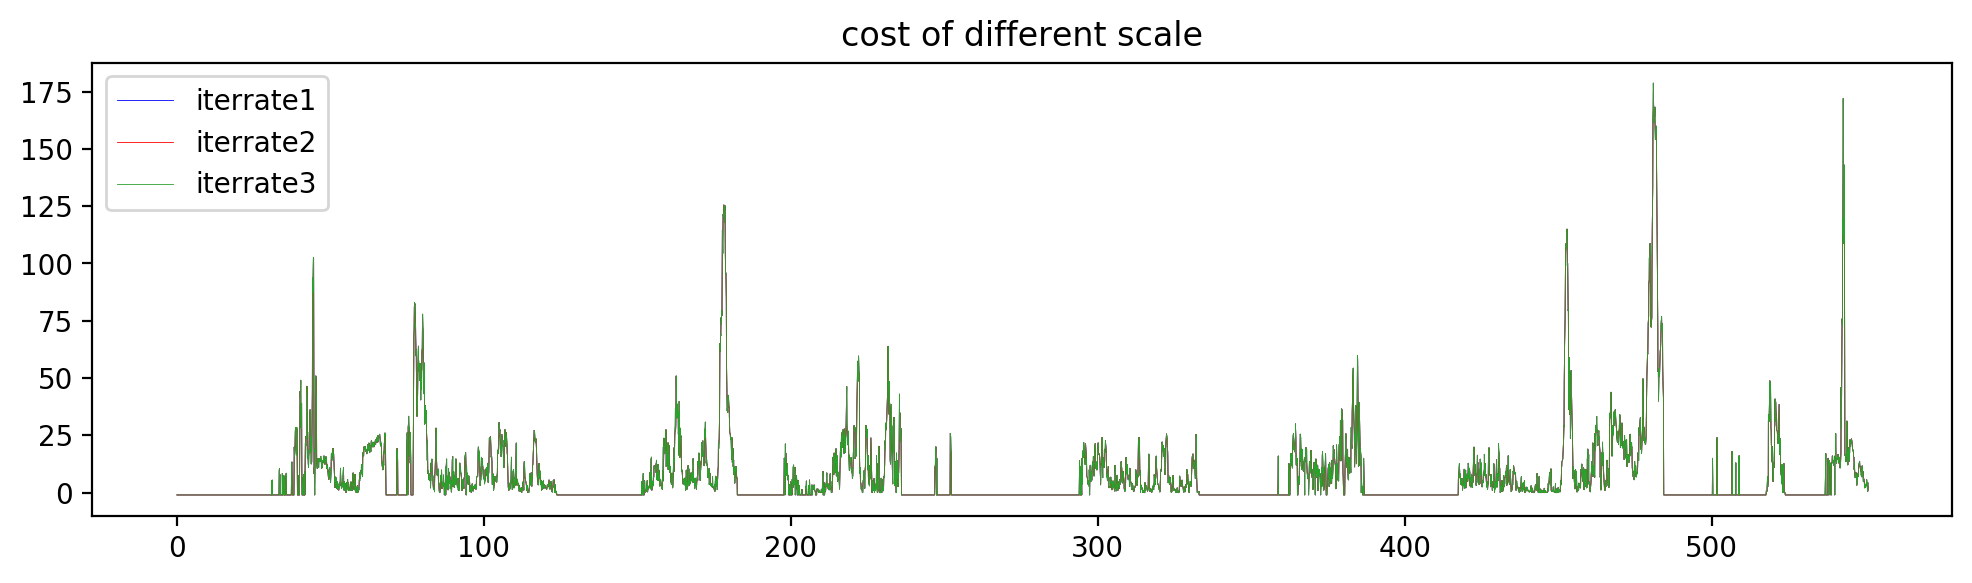

In [47]:
# file_path = "HectorDebugCost.csv"
with open('HectorDebugCost_rawCost.csv', 'r') as csvfile:
    data = list( csv.reader(csvfile, delimiter=',') )
    timestamp_raw = np.array(data)[:,0].astype('float64') # dtype: U5 means string length < 5
    cost1_raw = np.array(data)[:,1].astype('float32')
    cost2_raw = np.array(data)[:,2].astype('float32')
    cost3_raw = np.array(data)[:,3].astype('float32')
    
    flag1_raw = np.array(data)[:,4].astype('float32')
    flag2_raw = np.array(data)[:,5].astype('float32')
    flag3_raw = np.array(data)[:,6].astype('float32')
    
fig, ax = plt.subplots(figsize=(12,3), dpi=200)
plt.plot(timestamp_raw-timestamp_raw[0], cost1_raw, color='b', label='iterrate1', linewidth=0.3)
plt.plot(timestamp_raw-timestamp_raw[0], cost2_raw, color='r', label='iterrate2', linewidth=0.3)
plt.plot(timestamp_raw-timestamp_raw[0], cost3_raw, color='tab:green', label='iterrate3', linewidth=0.3)
plt.legend()
plt.title('cost of different scale')

Text(0.5, 1.0, 'compare with/wo adjust')

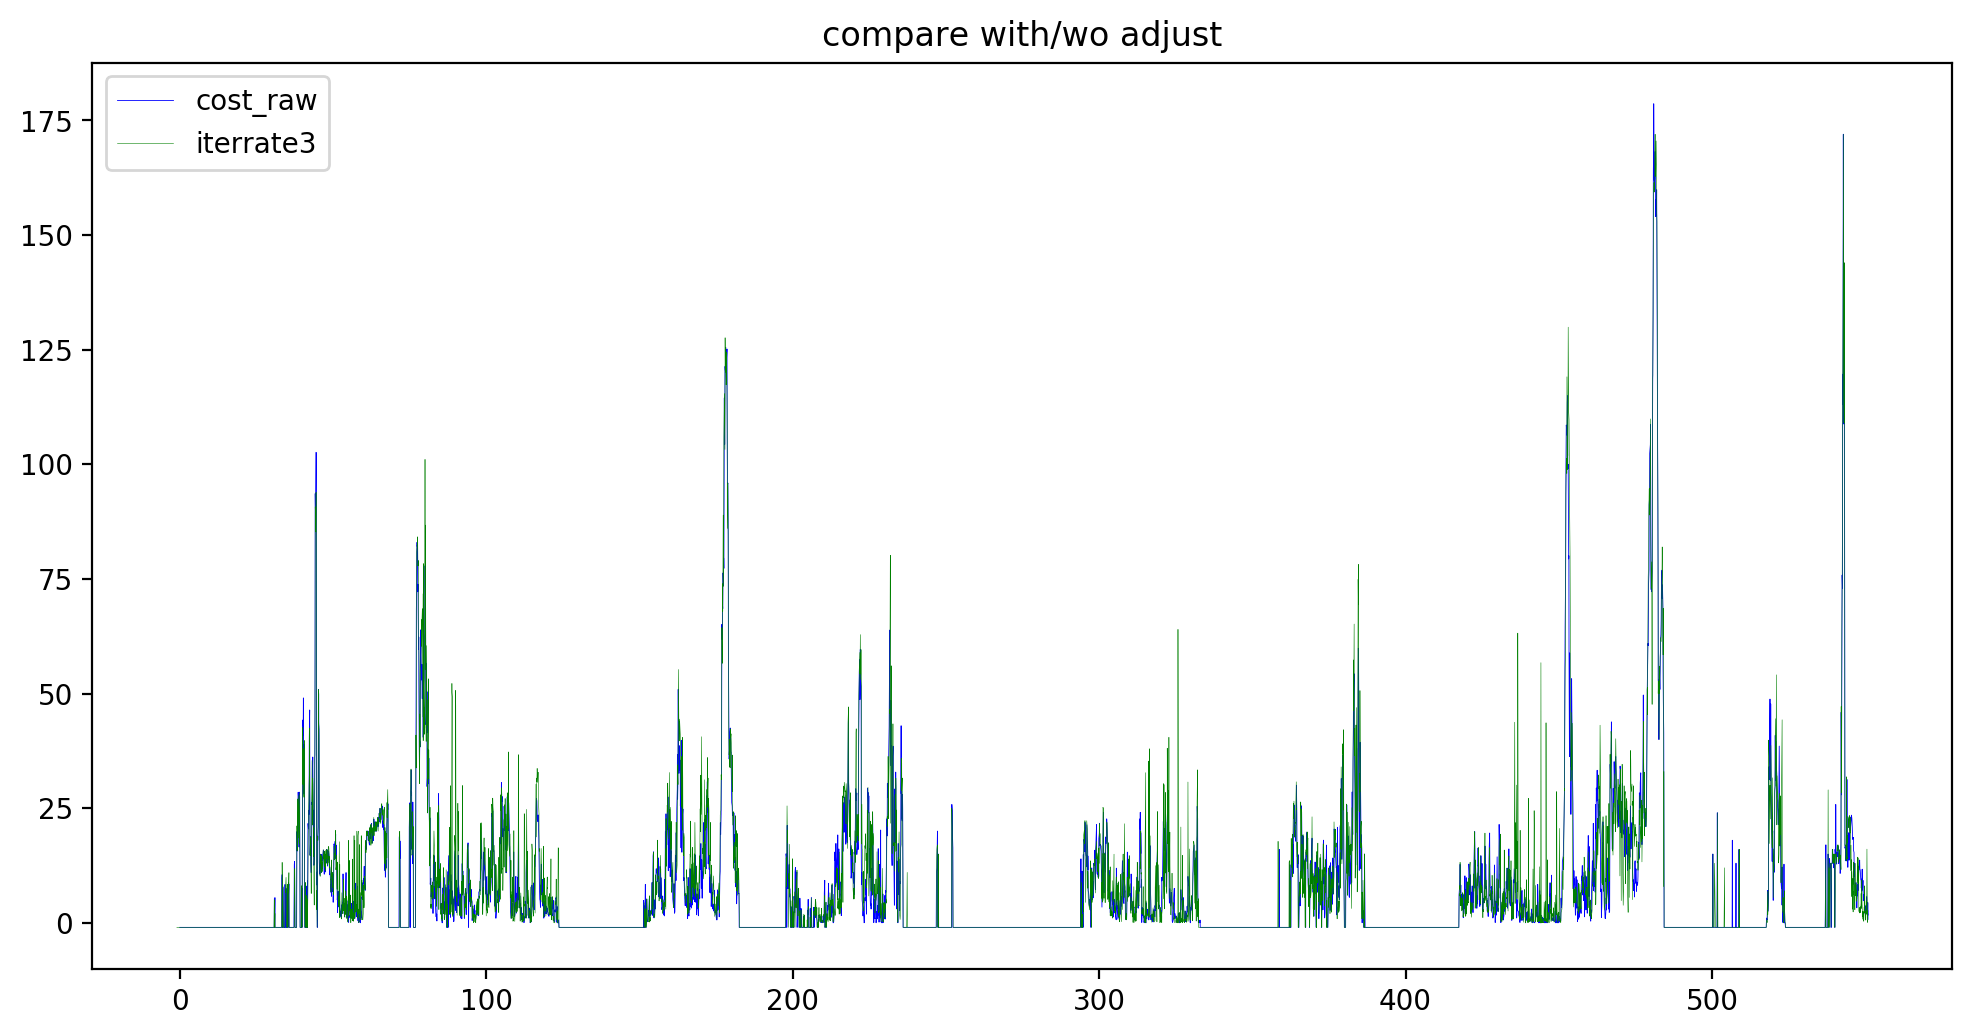

In [90]:
fig, ax = plt.subplots(figsize=(12,6), dpi=200)
plt.plot(timestamp_raw-timestamp_raw[0], cost1_raw, color='b', label='cost_raw', linewidth=0.3)
plt.plot(timestamp-timestamp_raw[0], cost1, color='r', label='iterrate1', linewidth=0.3)
plt.plot(timestamp-timestamp_raw[0], cost3, color='g', label='iterrate3', linewidth=0.2)
# plt.xlim(30,105)
plt.legend()
plt.title('compare with/wo adjust')

Text(0.5, 1.0, 'compare with/wo adjust')

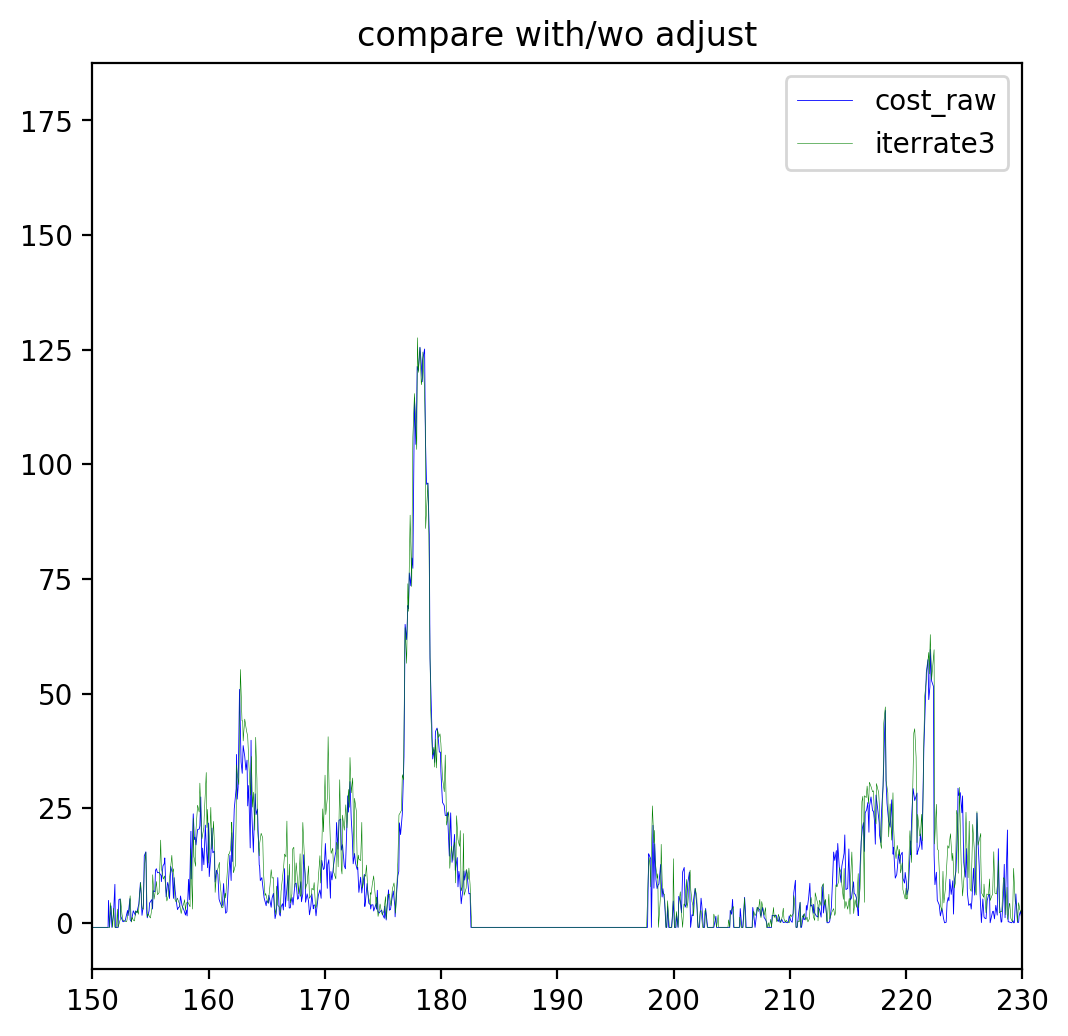

In [97]:
fig, ax = plt.subplots(figsize=(6,6), dpi=200)
plt.plot(timestamp_raw-timestamp_raw[0], cost1_raw, color='b', label='cost_raw', linewidth=0.3)
plt.plot(timestamp-timestamp_raw[0], cost3, color='g', label='iterrate3', linewidth=0.2)
plt.xlim(150,230)
plt.legend()
plt.title('compare with/wo adjust')

In [99]:
cost1_raw.shape, cost3.shape

((5969,), (6386,))

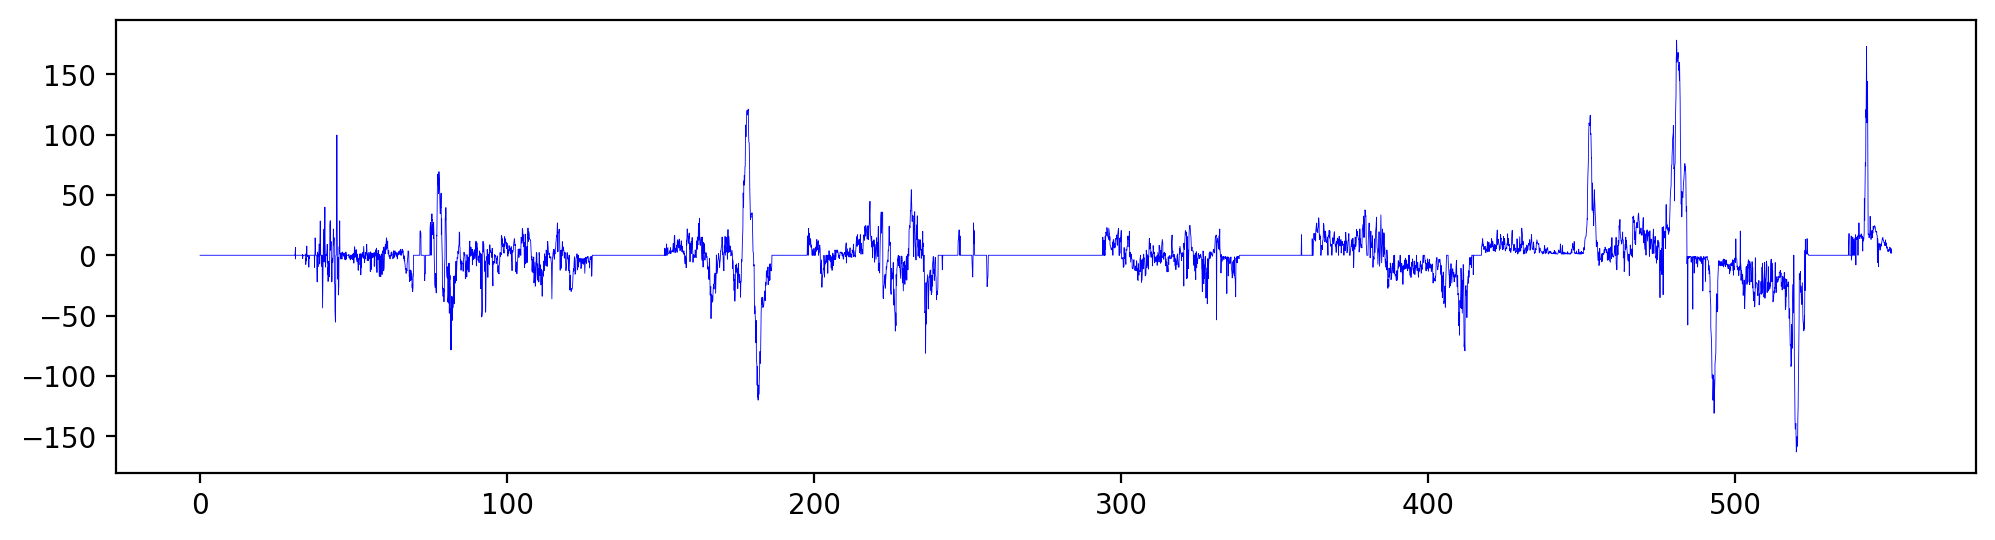

In [102]:
fig, ax = plt.subplots(figsize=(12,3), dpi=200)
plt.plot(timestamp_raw-timestamp_raw[0],cost1_raw-cost3[:5969], color='b', label='iterrate1_raw', linewidth=0.3)

Text(0.5, 1.0, 'cost of different scale')

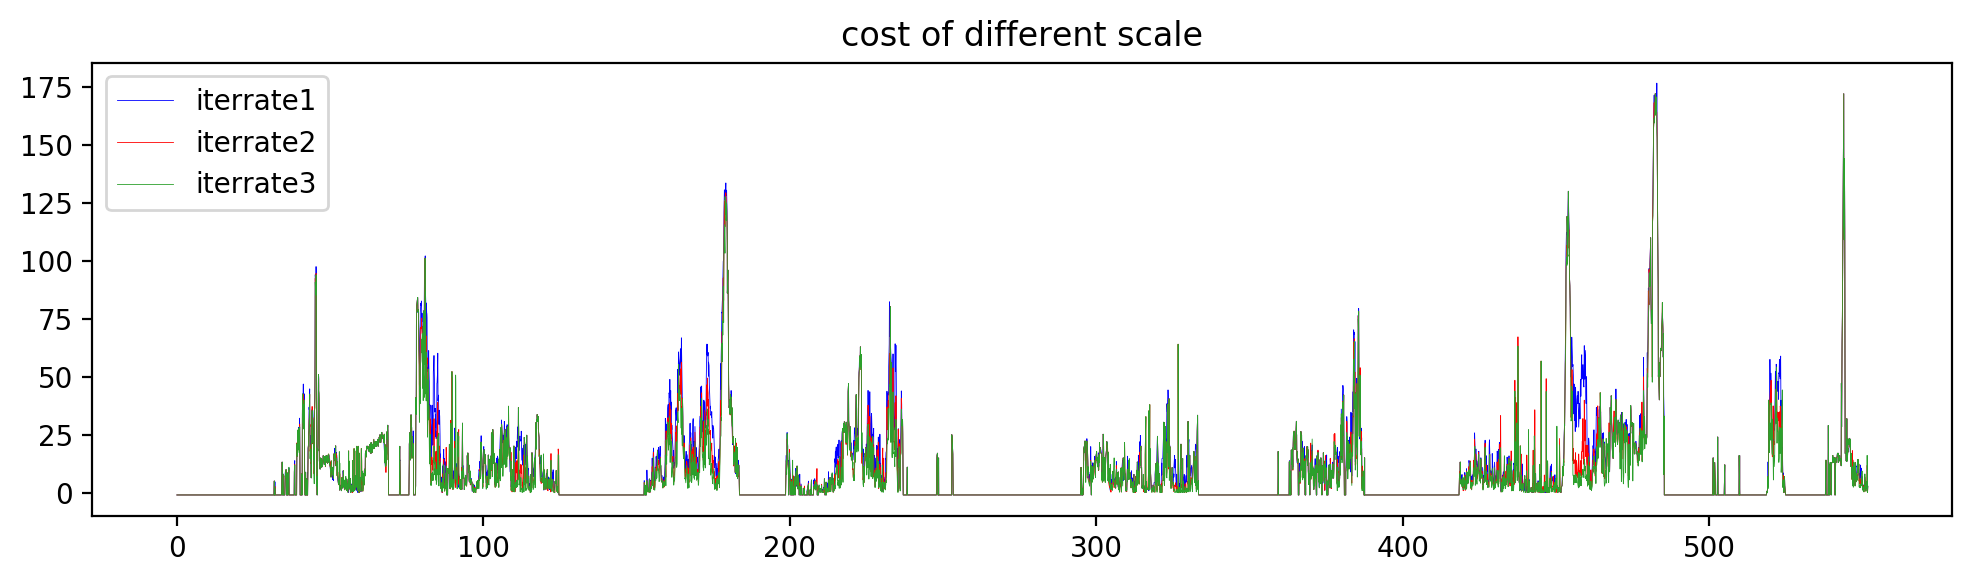

In [86]:
with open('HectorDebugCost_poseUpdate.csv', 'r') as csvfile:
    data = list( csv.reader(csvfile, delimiter=',') )
    timestamp = np.array(data)[:,0].astype('float64') # dtype: U5 means string length < 5
    cost1 = np.array(data)[:,1].astype('float32')
    cost2 = np.array(data)[:,2].astype('float32')
    cost3 = np.array(data)[:,3].astype('float32')
    
    flag1 = np.array(data)[:,4].astype('float32')
    flag2 = np.array(data)[:,5].astype('float32')
    flag3 = np.array(data)[:,6].astype('float32')
fig, ax = plt.subplots(figsize=(12,3), dpi=200)
plt.plot(timestamp-timestamp[0], cost1, color='b', label='iterrate1', linewidth=0.3)
plt.plot(timestamp-timestamp[0], cost2, color='r', label='iterrate2', linewidth=0.3)
plt.plot(timestamp-timestamp[0], cost3, color='tab:green', label='iterrate3', linewidth=0.3)
plt.legend()
plt.title('cost of different scale')